In [1]:
import numpy as np
import pandas as pd
import os
import datetime
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import STL
from statsmodels.graphics.tsaplots import plot_acf

In [3]:
files = os.listdir(r'C:\Users\gosti\Downloads\results (1)\results')

In [4]:
dfs = []
for f in files:
    df1 = pd.read_csv(r'C:\Users\gosti\Downloads\results (1)\results\Adygeja_Resp_2022-03-20.csv')
    dfs.append(df1)

In [5]:
data = pd.concat(dfs)

In [ ]:
df = pd.read_csv(r'C:\Users\gosti\Downloads\44_result\44_result.csv')

In [12]:
data = data.drop(columns=data[['customer inn', 'supplier inn', 'protocol date', 'doc']])
data = data.assign(bg=data.amount / data.price)
data = data.drop_duplicates()
data = data[data.bg <= 1]
data

,Unnamed: 0,obj hash,name,reg num,sign date,suppliers count,st date,end date,price,enforcement,amount,bg
0,0,3793294491059705333,contracts_output,1010101008321000004,2021-09-27,1,2021-09-27,2021-12-31,500000.00,1,25000.00,0.050000
1,1,-4348589201702449915,contracts_output,1010400570119000014,2019-08-08,1,2021-01-01,2021-12-31,933718.40,1,373500.00,0.400014
2,2,7104910193783858246,contracts_output,1010400570119000016,2019-09-03,1,2021-01-01,2021-12-31,125125.25,0,6256.26,0.050000
3,3,-1585908082334183978,contracts_output,1010400570119000027,2019-09-24,1,2021-01-01,2021-12-31,355169.38,1,19878.00,0.055968
4,4,-3961364508861951295,contracts_output,1010400570119000027,2019-09-24,1,2021-01-01,2021-12-31,388020.88,1,19878.00,0.051229
...,...,...,...,...,...,...,...,...,...,...,...,...
6359,6359,-4906157625135826188,contracts_output,3010800386421000022,2021-10-04,1,2021-10-04,2022-01-31,1452000.00,0,72600.00,0.050000
6360,6360,-8165939967697628755,contracts_output,3010800386421000022,2021-10-04,1,2021-10-04,2022-01-31,1452000.00,0,72600.00,0.050000
6361,6361,-725861710018253917,contracts_output,3010800386421000025,2021-10-25,1,2021-10-25,2021-12-31,106600.00,1,5500.00,0.051595
6362,6362,-2881107635711435453,contracts_output,3010800386421000025,2021-10-25,1,2021-10-25,2021-12-31,106599.90,1,5500.00,0.051595


In [55]:
df

,reg num,Region,customer inn,sign date,supplier inn,st date,end date,price,enforcement,amount,bg,supplier type
636,2010506625620000004,Adygeja,1.050663e+08,2019-12-30,1.050679e+08,2019-12-30,2020-01-13,137442.82,0,147800.00,0.929924,ЮР
1218,3010700853120000001,Adygeja,1.070085e+08,2020-01-09,2.308120e+09,2020-01-09,2020-12-31,450253.00,0,450253.00,1.000000,ЮР
1219,3010700853120000002,Adygeja,1.070085e+08,2020-01-09,1.070276e+08,2020-01-09,2020-12-31,2015263.00,0,2015263.00,1.000000,ЮР
1262,2010501406420000002,Adygeja,1.050141e+08,2020-01-10,7.724891e+11,2020-01-10,2020-12-31,21269.00,1,34182.00,0.622228,ИП
1384,3010400808220000005,Adygeja,1.040081e+08,2020-01-16,1.050032e+08,2020-01-16,2021-08-15,113200.00,0,113200.00,1.000000,ЮР
...,...,...,...,...,...,...,...,...,...,...,...,...
2286652,1753600824421000042,Zabajkalskij,7.536008e+09,2021-05-31,7.713057e+09,2021-05-31,2022-01-31,21923.22,0,22142.78,0.990084,ЮР
2286721,2753700310421000076,Zabajkalskij,7.537003e+09,2021-06-01,7.719482e+09,2021-06-01,2021-12-31,6996.00,0,31990.20,0.218692,ЮР
2286792,2753609569521000214,Zabajkalskij,7.536096e+09,2021-06-03,7.725285e+09,2021-06-03,2021-12-31,198810.00,1,228730.50,0.869189,ЮР
2286868,1753605746721000051,Zabajkalskij,7.536057e+09,2021-06-07,7.453308e+09,2021-06-07,2021-12-31,603.00,0,670.00,0.900000,ЮР


In [57]:
df.drop(columns=df[['customer inn', 'supplier inn', 'supplier type']], inplace=True)
df = df.drop_duplicates()
df = df[df.bg <= 1]

In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6359 entries, 0 to 6363
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       6359 non-null   int64  
 1   obj hash         6359 non-null   int64  
 2   name             6359 non-null   object 
 3   reg num          6359 non-null   int64  
 4   sign date        6359 non-null   object 
 5   suppliers count  6359 non-null   int64  
 6   st date          6359 non-null   object 
 7   end date         6359 non-null   object 
 8   price            6359 non-null   float64
 9   enforcement      6359 non-null   int64  
 10  amount           6359 non-null   float64
 11  bg               6359 non-null   float64
dtypes: float64(3), int64(5), object(4)
memory usage: 645.8+ KB


In [19]:
data['st date'] = data['st date'].astype('datetime64[ns]')
data['end date'] = data['end date'].astype('datetime64[ns]')

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18723 entries, 636 to 2287899
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   reg num        18723 non-null  int64  
 1   Region         18723 non-null  object 
 2   customer inn   18723 non-null  float64
 3   sign date      18723 non-null  object 
 4   supplier inn   18685 non-null  float64
 5   st date        18723 non-null  object 
 6   end date       18723 non-null  object 
 7   price          18723 non-null  float64
 8   enforcement    18723 non-null  int64  
 9   amount         18723 non-null  float64
 10  bg             18723 non-null  float64
 11  supplier type  18723 non-null  object 
dtypes: float64(5), int64(2), object(5)
memory usage: 1.9+ MB


In [60]:
df

,reg num,Region,sign date,st date,end date,price,enforcement,amount,bg
636,2010506625620000004,Adygeja,2019-12-30,2019-12-30,2020-01-13,137442.82,0,147800.00,0.929924
1218,3010700853120000001,Adygeja,2020-01-09,2020-01-09,2020-12-31,450253.00,0,450253.00,1.000000
1219,3010700853120000002,Adygeja,2020-01-09,2020-01-09,2020-12-31,2015263.00,0,2015263.00,1.000000
1262,2010501406420000002,Adygeja,2020-01-10,2020-01-10,2020-12-31,21269.00,1,34182.00,0.622228
1384,3010400808220000005,Adygeja,2020-01-16,2020-01-16,2021-08-15,113200.00,0,113200.00,1.000000
...,...,...,...,...,...,...,...,...,...
2286652,1753600824421000042,Zabajkalskij,2021-05-31,2021-05-31,2022-01-31,21923.22,0,22142.78,0.990084
2286721,2753700310421000076,Zabajkalskij,2021-06-01,2021-06-01,2021-12-31,6996.00,0,31990.20,0.218692
2286792,2753609569521000214,Zabajkalskij,2021-06-03,2021-06-03,2021-12-31,198810.00,1,228730.50,0.869189
2286868,1753605746721000051,Zabajkalskij,2021-06-07,2021-06-07,2021-12-31,603.00,0,670.00,0.900000


In [61]:
try:
    df['st date'] = df['st date'].astype('datetime64[ns]')
except pd.errors.OutOfBoundsDatetime:
    df['st date'] = df['sign date'].astype('datetime64[ns]')

In [62]:
df['end date'] = df['end date'].astype('datetime64[ns]')

In [67]:
df2 = pd.read_csv(r'C:\Users\gosti\Downloads\result.csv')

In [68]:
df2

,Unnamed: 0,reg num,supplier type,customer inn,sign date,supplier inn,st date,end date,price,enforcement,amount,protocol date,Region,bg
0,2802,3010100568619000004,ЮР,1.010057e+08,2019-04-12,1.030071e+08,2019-04-12,2019-12-31,11170860.00,1,3351258.00,2019-03-29,Adygeja,3.333333
1,262,1010501746719000024,ЮР,1.050175e+08,2019-06-25,2.635831e+09,2019-06-25,2021-12-31,89207.72,0,3478.40,2019-06-13,Adygeja,25.646194
2,6204,3010700913319000001,ЮР,1.070091e+08,2019-06-28,1.070300e+08,2019-06-28,2019-12-31,3154510.00,0,157725.50,2019-06-17,Adygeja,20.000000
3,1891,2010502596519000210,ЮР,1.050260e+08,2019-07-02,7.735165e+09,2019-07-02,2021-12-31,92438760.96,0,9243936.00,2019-06-18,Adygeja,9.999935
4,263,1010501746719000027,ИП,1.050175e+08,2019-07-15,1.080157e+10,2019-07-16,2021-12-19,200000.00,1,60000.00,2019-07-02,Adygeja,3.333333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3174272,2841,1753609333821000052,ЮР,7.536093e+09,2021-07-21,7.536178e+09,2023-01-01,2023-12-31,2024925.10,1,20249.25,2021-07-08,Zabajkalskij,100.000005
3174273,2855,1753609333821000059,ЮР,7.536093e+09,2021-08-04,3.810079e+09,2023-01-01,2023-12-31,2912100.00,1,145605.00,2021-07-20,Zabajkalskij,20.000000
3174274,2857,1753609333821000060,ЮР,7.536093e+09,2021-08-04,3.810079e+09,2023-01-01,2023-12-31,2727300.00,1,136365.00,2021-07-20,Zabajkalskij,20.000000
3174275,2886,1753609333821000075,ЮР,7.536093e+09,2021-10-04,5.262007e+09,2023-01-01,2023-12-31,85756.84,0,8662.31,2021-09-23,Zabajkalskij,9.899997


In [69]:
df2.drop(columns=df2[['Unnamed: 0','customer inn', 'supplier inn', 'protocol date', 'supplier type']], inplace=True)
df2 = df2.drop_duplicates()
df2 = df2[df2.bg <= 1]
df2

,reg num,sign date,st date,end date,price,enforcement,amount,Region,bg
89,3010400830020000019,2020-09-23,2020-09-23,2020-12-31,94111.75,0,94111.75,Adygeja,1.000000
543,1010501862221000009,2021-03-03,2021-03-01,2021-12-31,0.00,0,4201.15,Adygeja,0.000000
1429,3010503414121000005,2021-06-07,2021-06-07,2021-12-31,195500.00,1,230000.00,Adygeja,0.850000
1460,2010502596521000109,2021-06-09,2021-06-09,2021-12-31,1385680.00,0,1385680.00,Adygeja,1.000000
1788,3010503896421000003,2021-06-28,2021-06-28,2022-01-31,196515.62,0,196515.62,Adygeja,1.000000
...,...,...,...,...,...,...,...,...,...
3173229,2753601151122000037,2022-01-10,2022-01-10,2022-12-31,15360.00,0,15438.00,Zabajkalskij,0.994948
3173536,3750600145022000001,2022-01-17,2022-01-17,2022-12-31,89900.00,0,89900.00,Zabajkalskij,1.000000
3173565,1753605735422000006,2022-01-18,2022-01-18,2024-01-10,32556.52,0,98050.68,Zabajkalskij,0.332038
3173732,1753609333822000003,2022-01-25,2022-01-25,2022-12-30,116237.33,0,116237.33,Zabajkalskij,1.000000


In [58]:
df2['st date'] = df2['st date'].astype('datetime64[ns]')
df2['end date'] = df2['end date'].astype('datetime64[ns]')

OutOfBoundsDatetime: Out of bounds nanosecond timestamp: 202-08-25 00:00:00

In [70]:
try:
    df2['st date'] = df2['st date'].astype('datetime64[ns]')
except pd.errors.OutOfBoundsDatetime:
    df2['st date'] = df2['sign date'].astype('datetime64[ns]')
df2['end date'] = df2['end date'].astype('datetime64[ns]')

In [80]:
data = data.drop(columns=data[['Unnamed: 0', 'obj hash', 'name', 'sign date', 'suppliers count']])

KeyError: "None of [Index(['Unnamed: 0', 'obj hash', 'name', 'sign date', 'suppliers count'], dtype='object')] are in the [columns]"

In [ ]:
df = df.drop(columns=df[['Region', 'sign date']])

In [81]:
df2 = df2.drop(columns=df2[['Region', 'sign date']])

KeyError: "None of [Index(['Region', 'sign date'], dtype='object')] are in the [columns]"

In [114]:
new_data = pd.concat([data[data.amount<1e+10], df[df.amount<1e+10], df2[df2.amount<1e+10]])

In [105]:
new_data.dtypes

reg num                 int64
st date        datetime64[ns]
end date       datetime64[ns]
enforcement             int64
amount                float64
price                 float64
bg                    float64
dtype: object

In [109]:
new_data[new_data.amount == new_data.amount.max()]

,reg num,st date,end date,enforcement,amount,price,bg
23078,3231301743020000134,2020-04-27,2020-12-31,0,3.183002e+17,141113.0,4.433331e-13


In [115]:
new_data = new_data.groupby(['reg num', 'st date', 'end date','enforcement', 'amount'],as_index=False).max()

In [97]:
date_list = pd.date_range('01.01.2019', '01.01.2024', freq='MS')

In [116]:
def check(st, end):
    return list(map(lambda x: st<= x <= end, date_list))

In [117]:
t = np.zeros(len(date_list))

In [118]:
for r in new_data.iterrows():
    t+=np.array(check(r[1]['st date'], r[1]['end date'])) * r[1]['amount']

In [119]:
df3 = pd.DataFrame(t)

In [120]:
df3

,0
0,9.521607e+09
1,9.694658e+09
2,9.743083e+09
3,9.734815e+09
4,9.799898e+09
...,...
56,4.619199e+09
57,4.608927e+09
58,4.606584e+09
59,4.572946e+09


<AxesSubplot:>

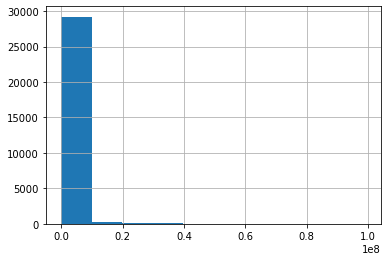

In [113]:
new_data.amount[new_data.amount<1e+]].hist()

<AxesSubplot:>

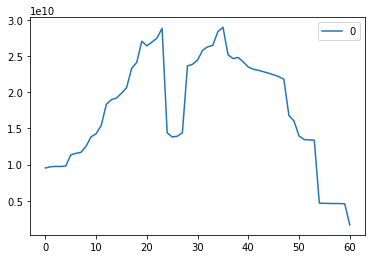

In [121]:
df3.plot()

In [122]:
results = pd.read_excel(r'C:\\Users\\gosti\\Downloads\\Telegram Desktop\\01_04_D_New_loans_subj.xlsx', sheet_name='итого', header=1)
results

,Unnamed: 0,Январь 2019,Февраль 2019,Март 2019,Апрель 2019,Май 2019,Июнь 2019,Июль 2019,Август 2019,Сентябрь 2019,...,Октябрь 2021,Ноябрь 2021,Декабрь 2021,Январь 2022,Февраль 2022,Март 2022,Апрель 2022,Май 2022,Июнь 2022,Июль 2022
0,РОССИЙСКАЯ ФЕДЕРАЦИЯ,3202534,3504045,4174296,4637280,3345201,4124086,5143083,5062245,5264321,...,7414571,6982998,9160939,5399672,6370846,5318699,4768289,3932303,5209410,4874474
1,ЦЕНТРАЛЬНЫЙ ФЕДЕРАЛЬНЫЙ ОКРУГ,2202020,2361149,2790972,3049199,2151149,2681735,3624143,3615662,3569935,...,5221385,5060629,6416921,3846772,4306586,3412877,2843099,2393340,3238339,3084991
2,Белгородская область,10656,13641,22394,33260,15048,16404,23440,21638,32400,...,30885,32346,29733,21701,27127,34418,38343,61199,37831,18814
3,Брянская область,3968,7068,11434,6742,6153,10049,8571,8093,8299,...,12103,13204,12104,7712,10633,11670,14354,11741,9777,9017
4,Владимирская область,6898,6571,8488,9735,9273,10299,12018,14054,12856,...,14354,15666,16622,10490,19408,14412,14385,14773,12162,11735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,Амурская область,3585,3556,6316,6126,6516,4082,5418,3189,4837,...,12191,10364,124977,18669,32695,7322,5921,4359,31936,4607
92,Магаданская область,2708,3056,5254,4551,1869,5002,4550,4884,9568,...,7156,5385,8156,4188,6608,8787,8179,10366,5201,5641
93,Сахалинская область,2723,4131,3855,12035,5664,4092,5864,4025,8775,...,5815,3842,6952,4051,10392,3244,4797,4908,5760,13035
94,Еврейская автономная область,183,162,15079,596,672,183,441,207,272,...,547,326,797,188,367,375,314,305,229,184


In [161]:
res = pd.DataFrame(results.iloc[0])

In [162]:
res

,0
Unnamed: 0,РОССИЙСКАЯ ФЕДЕРАЦИЯ
Январь 2019,3202534
Февраль 2019,3504045
Март 2019,4174296
Апрель 2019,4637280
Май 2019,3345201
Июнь 2019,4124086
Июль 2019,5143083
Август 2019,5062245
Сентябрь 2019,5264321


In [167]:
df3[:43]

,0
0,9.521607e+09
1,9.694658e+09
2,9.743083e+09
3,9.734815e+09
4,9.799898e+09
5,1.134458e+10
6,1.154754e+10
7,1.168800e+10
8,1.251625e+10
9,1.383017e+10


In [168]:
df4 = df3[:43]

In [169]:
df4 = df4.rename(columns={0: "amount"})
df4 = df4.rename_axis('date').reset_index()
df4['date'] = pd.date_range('31.01.2019', '31.07.2022', freq='M')

C:\Users\gosti\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3369: UserWarning: Parsing '31.01.2019' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  exec(code_obj, self.user_global_ns, self.user_ns)
C:\Users\gosti\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3369: UserWarning: Parsing '31.07.2022' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [170]:
df4 = df4.set_index('date')

In [ ]:
df4

In [160]:
res1

,date,credit
0,Январь 2019,3202534
1,Февраль 2019,3504045
2,Март 2019,4174296
3,Апрель 2019,4637280
4,Май 2019,3345201
5,Июнь 2019,4124086
6,Июль 2019,5143083
7,Август 2019,5062245
8,Сентябрь 2019,5264321
9,Октябрь 2019,5693608


In [172]:
res1 = pd.DataFrame(res[-43:])
res1 = res1.rename_axis('date').reset_index()
res1 = res1.rename(columns={0: "credit"})
res1['date'] = pd.date_range('31.01.2019', '31.07.2022', freq='M')
res1 = res1.set_index('date')

C:\Users\gosti\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3369: UserWarning: Parsing '31.01.2019' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  exec(code_obj, self.user_global_ns, self.user_ns)
C:\Users\gosti\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3369: UserWarning: Parsing '31.07.2022' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [134]:
res1

,credit
date,
2019-01-31,3202534
2019-02-28,3504045
2019-03-31,4174296
2019-04-30,4637280
2019-05-31,3345201
2019-06-30,4124086
2019-07-31,5143083
2019-08-31,5062245
2019-09-30,5264321


In [138]:
data_mod = pd.concat([df4,res1], axis=1, join='inner')

In [143]:
data_mod

,amount,credit
date,,
2019-01-31,9.521607e+09,3202534
2019-02-28,9.694658e+09,3504045
2019-03-31,9.743083e+09,4174296
2019-04-30,9.734815e+09,4637280
2019-05-31,9.799898e+09,3345201
2019-06-30,1.134458e+10,4124086
2019-07-31,1.154754e+10,5143083
2019-08-31,1.168800e+10,5062245
2019-09-30,1.251625e+10,5264321


In [145]:
np.corrcoef(data_mod.credit.astype(int), data_mod.amount)

array([[1.        , 0.62182265],
       [0.62182265, 1.        ]])

In [147]:
from statsmodels.tsa.seasonal import seasonal_decompose

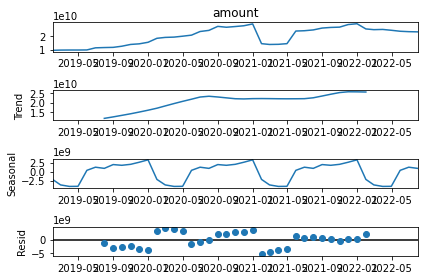

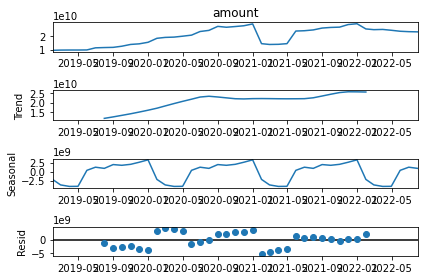

In [185]:
decompose_result_amount = seasonal_decompose(data_mod['amount'],model='additive')
decompose_result_amount.plot()

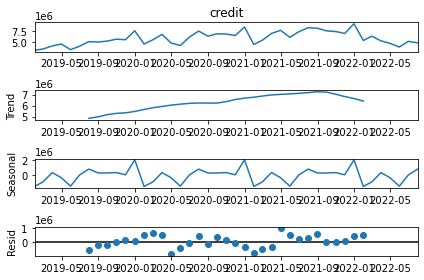

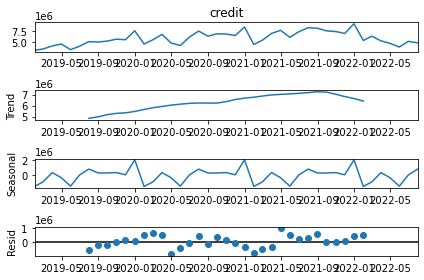

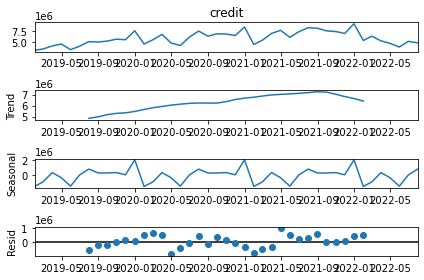

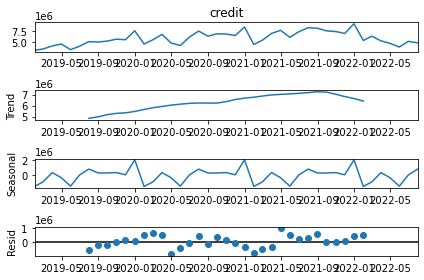

In [187]:
decompose_result_credit = seasonal_decompose(data_mod['credit'],model='additive')
decompose_result_credit.plot()

In [181]:
from statsmodels.tsa.stattools import adfuller

In [182]:
adf_test = adfuller(data_mod.amount)
print('p-value = ' + str(adf_test[1]))
if adf_test[1]>0.05:
    print('Ряд не стационарный')
else:
    print('Ряд стационарный')

p-value = 0.34064190469586075
Ряд не стационарный


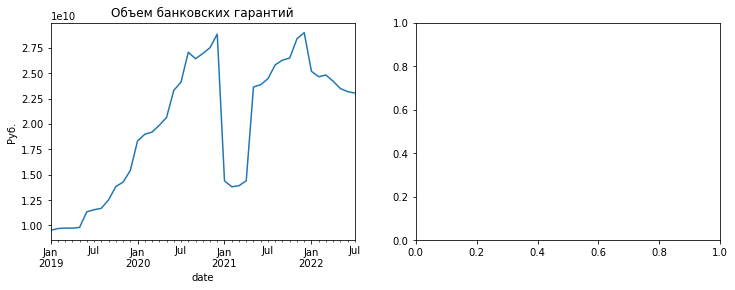

In [192]:
fig = plt.figure(figsize=(12,4))
ax1 = fig.add_subplot(121)
data_mod['amount'].plot(ax=ax1)
ax1.set_title(u'Объем банковских гарантий')
ax1.set_ylabel(u'Руб.')
ax2 = fig.add_subplot(122)

In [198]:
data_mod['date1'] = pd.date_range('31.01.2019','31.07.2022', freq='M')

C:\Users\gosti\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3369: UserWarning: Parsing '31.01.2019' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  exec(code_obj, self.user_global_ns, self.user_ns)
C:\Users\gosti\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3369: UserWarning: Parsing '31.07.2022' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [203]:
data_mod['month_num'] = range(1,len(data_mod)+1)

In [204]:
for x in range(1,13):
    data_mod['season_' + str(x)] = data_mod['date'].dt.month == x

In [206]:
season_columns = ['season_' + str(x) for x in range(1,13)]
X = data_mod[['month_num'] + season_columns]
Y = data_mod['amount']
X1 = X[X.index < 36]
Y1 = Y[Y.index < 36]

TypeError: Invalid comparison between dtype=datetime64[ns] and int

In [202]:
new_dates = pd.date_range('2019-01-31', '2019-12-31', freq='M')
new_dates = pd.Index(data_mod['date1']) | new_dates
df5 = pd.DataFrame({'date1': new_dates})
df6 = pd.merge(data_mod, df5, on='date1', how='right')

C:\Temp\ipykernel_6204\2432170969.py:2: FutureWarning: Index.__or__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__or__.  Use index.union(other) instead.
  new_dates = pd.Index(data_mod['date1']) | new_dates


In [151]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

C:\Users\gosti\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\Users\gosti\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


<AxesSubplot:title={'center':'Holt Winters Triple Exponential Smoothing: Additive Seasonality'}, xlabel='date'>

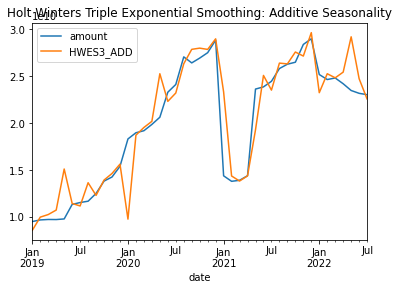

In [152]:
data_mod['HWES3_ADD'] = ExponentialSmoothing(data_mod['amount'],trend='add',seasonal='add',seasonal_periods=12).fit().fittedvalues
data_mod[['amount','HWES3_ADD']].plot(title='Holt Winters Triple Exponential Smoothing: Additive Seasonality')

In [154]:
train_amount_add = data_mod.amount[:36]
test_amount_add = data_mod.amount[36:]

In [157]:
test_amount_add

date
2022-01-31    2.518031e+10
2022-02-28    2.464798e+10
2022-03-31    2.481306e+10
2022-04-30    2.419807e+10
2022-05-31    2.347964e+10
2022-06-30    2.317907e+10
2022-07-31    2.303487e+10
Name: amount, dtype: float64

In [178]:
fitted_model_add = ExponentialSmoothing(train_amount_add,trend='add',seasonal='add',seasonal_periods=12).fit()
test_predictions_add = fitted_model_add.forecast(6)

C:\Users\gosti\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\Users\gosti\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


In [200]:
fitted_model_add = ExponentialSmoothing(test_amount_add,trend='add',seasonal='add',seasonal_periods=12).fit()

C:\Users\gosti\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)


ValueError: Cannot compute initial seasonals using heuristic method with less than two full seasonal cycles in the data.

Text(0.5, 1.0, 'Train, Test and Predicted Test')

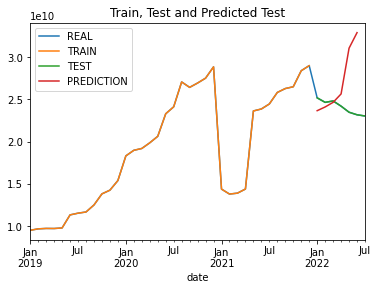

In [179]:
data_mod.amount.plot(legend=True,label='REAL')
train_amount_add.plot(legend=True,label='TRAIN')
test_amount_add.plot(legend=True,label='TEST', figsize=(6,4))
test_predictions_add.plot(legend=True,label='PREDICTION')
plt.title('Train, Test and Predicted Test')

ConversionError: Failed to convert value(s) to axis units: '2022–30–06'

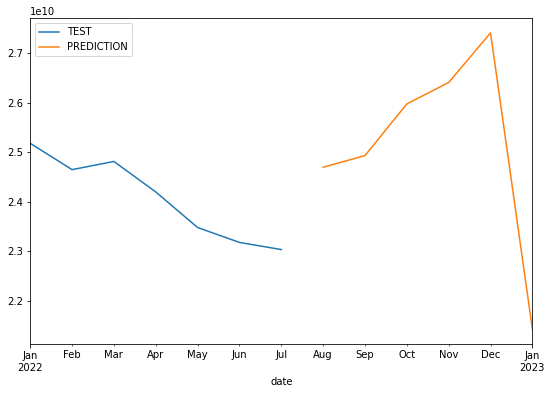

In [177]:
test_amount_add.plot(legend=True,label='TEST',figsize=(9,6))
test_predictions_add.plot(legend=True,label='PREDICTION',xlim=['2022–30–06','2023–31–07'])